# Explore here

In [35]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')

df


,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [36]:
df['is_spam'] = df['is_spam'].apply(lambda x: 1 if x else 0).astype(int)
df.head()


,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [37]:
print(df.shape)
df = df.drop_duplicates()
df = df.reset_index(inplace = False,drop=True)
df.shape

(2999, 2)


(2369, 2)

In [38]:
print(f"Spam: {len(df.loc[df.is_spam == 1])}")
print(f"No spam: {len(df.loc[df.is_spam == 0])}")

Spam: 244
No spam: 2125


In [39]:
import regex as re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

df["url"] = df["url"].apply(preprocess_text)
df.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",1
1,"[https, www, hvper, com]",1
2,"[https, briefingday, com, v, i]",1
3,"[https, briefingday, com, m, commentform]",0
4,"[https, briefingday, com, fan]",1


In [40]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

download('wordnet')
lemmatizer = WordNetLemmatizer()

download('stopwords')
stop_words = stopwords.words('english')

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

df["url"] = df["url"].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[http, briefingday, list, manage, unsubscribe]",1
1,"[http, hvper]",1
2,"[http, briefingday]",1
3,"[http, briefingday, commentform]",0
4,"[http, briefingday]",1


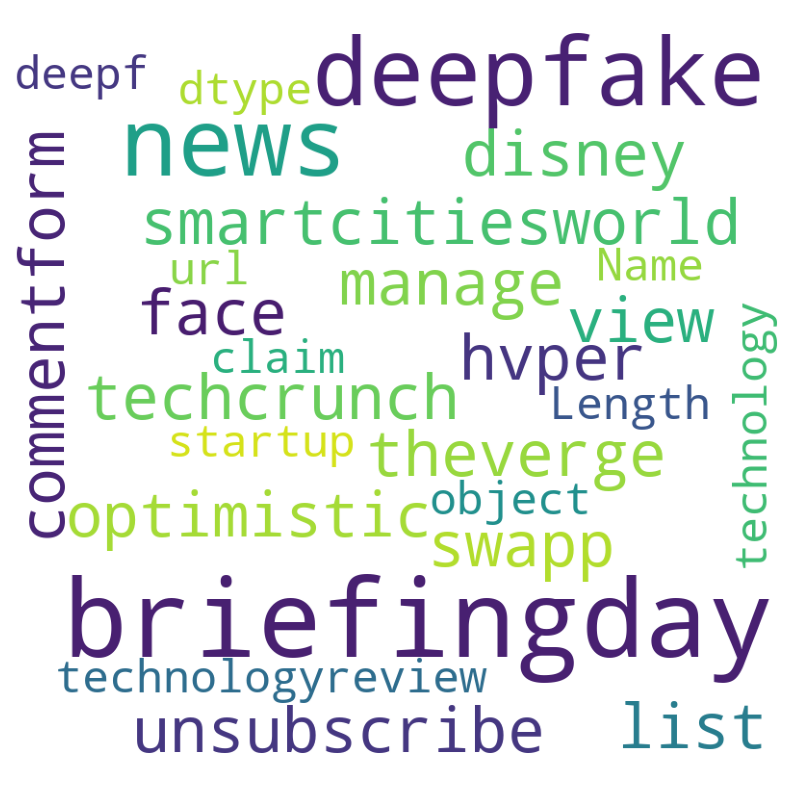

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000, min_font_size=10, random_state=42).generate(str(df['url']))

fig = plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

lista_tokens = df['url']
lista_tokens = [" ".join(tokens) for tokens in lista_tokens]

lista_tokens

['http briefingday list manage unsubscribe',
 'http hvper',
 'http briefingday',
 'http briefingday commentform',
 'http briefingday',
 'http brookings interactives reopening america world',
 'http reuters investigates special report health coronavirus britain',
 'http theatlantic magazine archive supermarket miracle',
 'http john bolton book excerpt trump ukraine china',
 'http theguardian travel tourism coronavirus pandemic travel industry',
 'http future article virus disappeared',
 'http narratively quarantined hippy trapped jungle paradise',
 'http ourworldindata grapher daily covid case average',
 'http spiked online healthy society destroy monument',
 'http nytimes interactive business economy container ship built html',
 'http aeon essay nostalgia rocket fuel power hope change',
 'http youtube watch briefingday curator briefingday source briefingday medium email',
 'http popsci story science haribo gummy candy flavor',
 'http atlasobscura article coffee',
 'http outsideonline j

In [43]:
vectorizer = TfidfVectorizer(max_features=5000,max_df=0.8,min_df=5)
X = vectorizer.fit_transform(lista_tokens).toarray()
y = df.is_spam

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [45]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)


0.9620253164556962

In [46]:
from sklearn.model_selection import GridSearchCV

hyperparametros = {
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'kernel':['linear','poly','rbf','sgmoid'],
    'degree':[1,2,3,4,5],
    'gamma':['scl','auto']
}

grid = GridSearchCV(model,hyperparametros,scoring='accuracy',cv=5)
grid

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scl', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sgmoid']},
             scoring='accuracy')

In [47]:
grid.fit(X_train,y_train)

print(grid.best_params_)
m_modelo = grid.best_estimator_

y_m_pred = m_modelo.predict(X_test)
accuracy_score(y_test,y_m_pred)


{'C': 1000, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
875 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
700 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

0.9620253164556962

In [48]:
from pickle import dump

dump(m_modelo,open('../models/svm_clasificador_grilla_42.sav','wb'))